In [32]:
# Testing the installation of cflow
#%pip install git+https://github.com/oduerr/cflow.git
from cflow.utils import print_hello
print_hello()

from cflow.utils import *
print_hello()

Hello from clflow.utils
Hello from clflow.utils


### Demonstration of the transformation function

The Bernstein Polynomials are defined between [0,1]. We interpolate them linearly. The extrapolation starts at L_START and R_START in the code below.

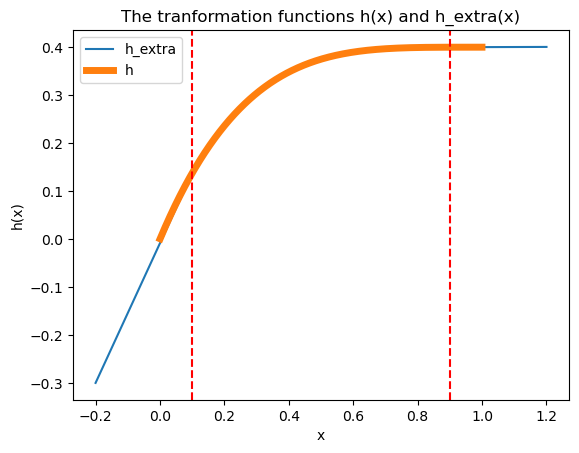

Text(0.5, 1.0, 'The derivatives of the tranformation functions h(x) and h_extra(x)')

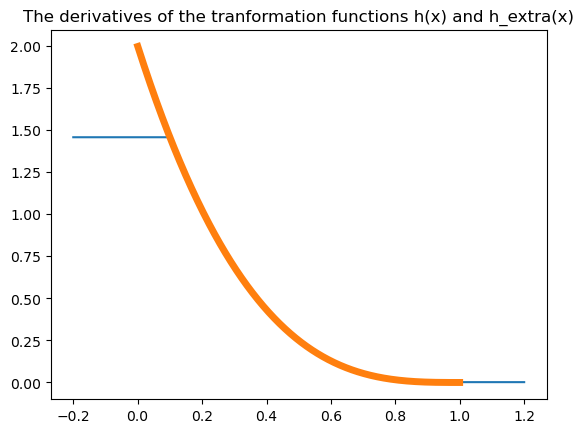

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from cflow.one_dim_transforms import h_dag, h_dag_dash, h_dag_extra, h_dag_dash_extra

# Creating X-values
N = 1000
x = np.linspace(-0.2,1.2,N)
X = np.zeros((N,3))
X[:,0] = x
X[:,1] = x
X[:,2] = x
# Transform in tensor flow
X_tf = tf.constant(X, dtype=tf.float32)
#print(X_tf)

theta_vals = np.tile(np.array([0., 2., 2., 2., 2.]), (3, 1))
theta_batch = np.tile(np.expand_dims(theta_vals, 0), (N, 1, 1))
theta = tf.constant(theta_batch, dtype=tf.float32)
#print(theta) # shape, 3, 5

h = h_dag(X_tf, theta).numpy()[:,0]
L_START = 0.1
R_START = 0.9
h_extra = h_dag_extra(X_tf, theta, L_START, R_START).numpy()[:,0]

#Plot x vs h and h_extra
plt.plot(x, h_extra, label='h_extra')
plt.plot(x, h, label='h', linewidth=5)
# Add the vertical lines at the start and end of the transformation
plt.axvline(x=L_START, color='r', linestyle='--')
plt.axvline(x=R_START, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.title('The tranformation functions h(x) and h_extra(x)')
plt.show()

# Same but now with the dash functions
h_dash = h_dag_dash(X_tf, theta).numpy()[:,0]
h_dash_extra = h_dag_dash_extra(X_tf, theta, L_START, R_START).numpy()[:,0]
plt.plot(x, h_dash_extra, label='h_extra')
plt.plot(x, h_dash, label='h', linewidth=5)
plt.title('The derivatives of the tranformation functions h(x) and h_extra(x)')

